In [2]:
# anirudh Sathish 
# question 3 
# CS20B1125 

Find and plot the decision boundary between class ω1 and ω2. Assume P(ω1) = P(ω2).
ω1 = [2,6; 3,4; 3,8; 4,6]
ω2 = [3,0; 1,-2; 3,-4; 5,-2]

In [41]:
# importing some neccesary libraries 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sympy import solve

In [42]:
# lets represent class w1
l1 = [[2,6],[3,4], [3,8] ,[4,6]]
w1 = np.array(l1)

# simmilarly class w2
l2 = [[3,0], [1,-2], [3,-4], [5,-2]]
w2 = np.array(l2)

In [43]:
# find covariance matrix of each of the classes 

cov_w1 = np.cov(w1.T)
cov_w2 = np.cov(w2.T)

In [44]:
# let us look at the covariance matrices to look at what case they satisfy 
print("Cov1 :\n")
print(cov_w1)
print("\nCov2 :\n")
print(cov_w2)

Cov1 :

[[0.66666667 0.        ]
 [0.         2.66666667]]

Cov2 :

[[2.66666667 0.        ]
 [0.         2.66666667]]


The above is case 3 

In [45]:
# calculate the iverse of the covariance matrix 
inv_Cov_w1 = np.linalg.inv(cov_w1)
inv_Cov_w2 = np.linalg.inv(cov_w2)

# calculate mean 
mean_w1 = np.mean(w1,axis = 0)
mean_w2 = np.mean(w2 , axis = 0)
print(mean_w1,mean_w2)
print("\n")
print(inv_Cov_w1,inv_Cov_w2)

[3. 6.] [ 3. -2.]


[[1.5   0.   ]
 [0.    0.375]] [[0.375 0.   ]
 [0.    0.375]]


Equation : X.T*Ai*X + Bi.T*X + Ci

In [46]:
# for calculating decision boundary 
from sympy import symbols , expand , Poly

x , y = symbols('x , y')
X = np.array([[x],[y]])
print(X)

p_w1 = 0.5 
p_w2 = 0.5

[[x]
 [y]]


In [47]:
# for class w1 
Ai_class_w1 = -0.5*inv_Cov_w1

Bi_class_w1 = inv_Cov_w1 @ mean_w1

#Ci_class_w1 = (-0.5*np.matmul((mean_w1.T),inv_Cov_w1,mean_w1))-0.5*(np.log(np.linalg.det(cov_w1))) + np.log(p_w1)
Ci_class_w1 = -0.5*np.matmul(np.matmul(mean_w1.T,inv_Cov_w1),mean_w1)-0.5*(np.log(np.linalg.det(cov_w1))) + np.log(p_w1)

#g_w1 = np.matmul(X,Ai_class_w1,X.T)+ np.matmul(Bi_class_w1.T,X)+Ci_class_w1

In [48]:
# for class w2 
Ai_class_w2 = -0.5*inv_Cov_w2

Bi_class_w2 = inv_Cov_w2@mean_w2

#Ci_class_w2 = (-0.5*np.matmul((mean_w2.T),inv_Cov_w2,mean_w2))-0.5*(np.log(np.linalg.det(cov_w2))) + np.log(p_w2)
Ci_class_w2 = -0.5*np.matmul(np.matmul(mean_w2.T,inv_Cov_w2),mean_w2)-0.5*(np.log(np.linalg.det(cov_w2))) + np.log(p_w2)


#g_w2 = np.matmul(X.T,Ai_class_w2,X)+ np.matmul(Bi_class_w2.T,X)+Ci_class_w2

In [51]:
gx = X.T @ (Ai_class_w1-Ai_class_w2) @ X + (Bi_class_w1- Bi_class_w2).T @ X + (Ci_class_w1 - Ci_class_w2)
print(gx[0])

[-0.5625*x**2 + 3.375*x + 3.0*y - 10.3693528194401]


In [54]:
sol = solve(gx[0],y)
print(sol)

{y: 0.1875*x**2 - 1.125*x + 3.45645093981337}


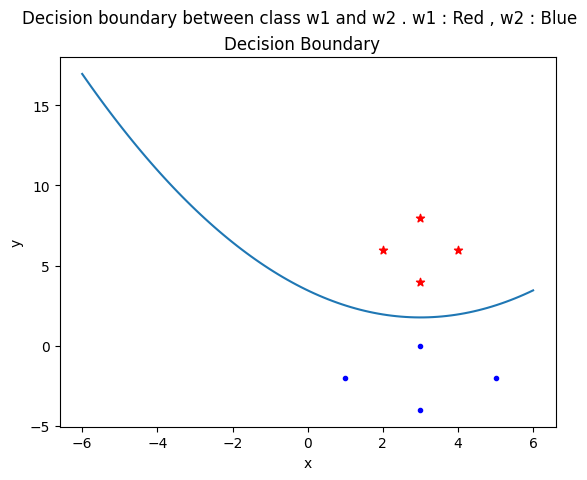

In [56]:
x_temp = np.linspace(-6,6,100)
y_temp = 0.1875*x_temp**2 - 1.125*x_temp + 3.45645093981337

plt.plot(x_temp,y_temp)
plt.scatter(w1[:,0],w1[:,1],color = 'red' , marker = '*')
plt.scatter(w2[:,0],w2[:,1],color = 'blue', marker = '.')

plt.xlabel("x")
plt.ylabel("y")
title = "Decision boundary between class w1 and w2 . w1 : Red , w2 : Blue"
plt.suptitle(title)
plt.title('Decision Boundary  ')
plt.show()